# 正規化項

## Ridge

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv")
# 欠損値対応
df.dropna(inplace=True)

In [34]:
# データ準備
y_col = 'Salary'
X = df.loc[:, df.columns!=y_col]
y = df[y_col]
# 標準化のために数値カラムのリストを作成
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()
# ダミー変数作成は数値カラムのリスト作成の後
X = pd.get_dummies(X, drop_first=True)
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 標準化
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
# モデル学習
ridge = Ridge()
ridge.fit(X_train, y_train)
# 予測
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [29]:
# サラリーが予測値と比較して実際の値から平均どのくらいずれているか　 結果：251k
mean_absolute_error(y_test, y_pred)

251.01058042384872

In [35]:
ridge.coef_

array([-255.99352472,  265.41620796,   49.85450911,  -43.4415344 ,
          6.40827279,  126.64463957,  -39.99788141, -180.02267219,
        242.39467113,  -36.09606293,  281.13852012,   46.31799934,
       -164.64027314,   70.88806172,   41.295514  ,  -34.06922615,
         -8.54724705,  -97.91075067,   35.72441367])

In [33]:
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [37]:
# 線形回帰との比較
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_

array([-269.10981701,  272.90887884,   59.97669544,  -55.37512444,
          3.61504229,  131.08295524,  -14.78202567, -514.20110584,
        550.22369897,  -12.29554582,  299.04286135,    4.60615938,
       -156.78117836,   73.32237801,   54.94973217,  -35.64306984,
          1.59251626,  -95.02251105,   28.46798552])

# さまざまなλでのRidge

In [43]:
# さまざまな特徴量からサラリーを予測するモデルを作成
alphas = np.logspace(-3, 3)
mse_list = []
coefs = []
for alpha in alphas:
    model = Ridge(alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # MSEで評価
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    # Ridgeの係数
    coefs.append(model.coef_)

Text(0, 0.5, 'test MSE')

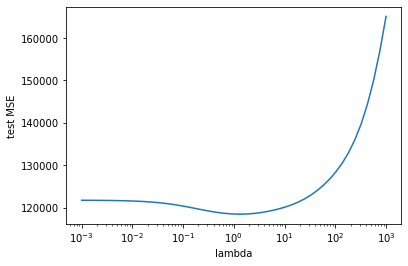

In [48]:
# λとMSEの比較
plt.plot(alphas, mse_list)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('test MSE')

Text(0, 0.5, 'standardized coefficients')

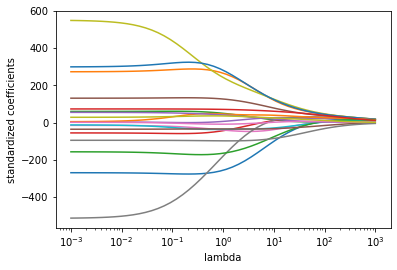

In [49]:
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('standardized coefficients')